### This script contains the following:

#### 1. Importing libraries and data 
#### 2. Preparing Data
#### 3.The elbow technique
#### 4. k-means clustering
#### 5. Visualizations
#### 6. Cluster Summary Stats

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# make sure plots are displayed automatically
%matplotlib inline

In [3]:
# define path
path = r"C:\Users\Asus 17\OneDrive\Desktop\Achievement 6\amsterdam"

In [22]:
# import listings_numeric
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_numeric.csv'))

In [5]:
df.shape

(20030, 22)

In [6]:
df.head()

,Unnamed: 0,id,host_id,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,...,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count
0,0,2818,3159,NaN,59.0,NaN,1.0,100.0,50.0,1,...,15,248,97.0,10.0,10.0,10.0,10.0,9.0,10.0,1
1,1,3209,3806,NaN,160.0,543.0,2.0,300.0,40.0,2,...,20,42,96.0,10.0,9.0,10.0,10.0,9.0,9.0,1
2,2,20168,59484,NaN,80.0,NaN,NaN,NaN,NaN,2,...,1000,233,87.0,9.0,10.0,9.0,9.0,10.0,9.0,2
3,3,25428,56142,NaN,125.0,650.0,2.0,300.0,40.0,2,...,60,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2
4,4,27886,97647,NaN,150.0,810.0,2.0,0.0,0.0,1,...,730,171,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1


## 2. Preparing Data

In [23]:
df = df.drop(columns = 'Unnamed: 0')

In [14]:
df.columns

Index(['id', 'host_id', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count'],
      dtype='object')

In [17]:
# create a subset of columns about the listings 
df_list = df[['square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'calculated_host_listings_count']]

In [18]:
# create a subset of columns about the ratings (with a range 1-10)
df_rate = df[['review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]

In [24]:
#check df_rate for missing values
df_rate.isnull().sum()

review_scores_accuracy         2649
review_scores_cleanliness      2647
review_scores_checkin          2661
review_scores_communication    2652
review_scores_location         2660
review_scores_value            2659
dtype: int64

In [25]:
#take a look at df_rate
df_rate.shape

(20030, 6)

In [26]:
df_rate.describe()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,17381.000000,17383.000000,17369.000000,17378.000000,17370.000000,17371.000000
mean,9.679765,9.465627,9.735563,9.785361,9.421531,9.175004
std,0.685271,0.867973,0.646557,0.599409,0.727931,0.805422
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [29]:
# create a new subset where the nans are replaced with the col mean
df_rate2 = df_rate.fillna(df_rate.mean())

In [30]:
#check it out
df_rate2.describe()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,20030.000000,20030.000000,20030.000000,20030.000000,20030.000000,20030.000000
mean,9.679765,9.465627,9.735563,9.785361,9.421531,9.175004
std,0.638348,0.808587,0.602077,0.558317,0.677872,0.750056
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,9.679765,9.000000,9.735563,9.785361,9.000000,9.000000
50%,10.000000,10.000000,10.000000,10.000000,9.421531,9.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [31]:
#save it as the new df_rate
df_rate = df_rate2

In [32]:
#take a look at df_list
df_list.shape

(20030, 13)

In [33]:
#check for missings
df_list.isnull().sum()

square_feet                       19624
price                                 0
weekly_price                      17187
monthly_price                     18469
security_deposit                   6166
cleaning_fee                       3629
guests_included                       0
extra_people                          0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0
review_scores_rating               2639
calculated_host_listings_count        0
dtype: int64

In [34]:
df_list.describe()

,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count
count,406.000000,20030.000000,2843.000000,1561.000000,13864.000000,16401.000000,20030.000000,20030.000000,20030.000000,20030.000000,20030.000000,17391.000000,20030.000000
mean,520.485222,148.744733,491.176926,33.491352,174.198211,39.271569,1.468997,11.315876,3.328707,631.225711,21.560459,94.849520,4.734698
std,544.557660,89.990324,305.786371,160.358641,164.844529,24.268398,0.937890,22.152063,12.537419,541.339981,43.240292,6.648685,22.921886
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,20.000000,1.000000
25%,0.000000,95.000000,310.000000,1.000000,0.000000,25.000000,1.000000,0.000000,2.000000,21.000000,3.000000,93.000000,1.000000
50%,484.000000,125.000000,570.000000,2.000000,150.000000,35.000000,1.000000,0.000000,2.000000,1125.000000,8.000000,97.000000,1.000000
75%,807.000000,175.000000,700.000000,3.000000,250.000000,50.000000,2.000000,20.000000,3.000000,1125.000000,22.000000,100.000000,1.000000
max,4306.000000,999.000000,999.000000,998.000000,999.000000,531.000000,16.000000,280.000000,1001.000000,9999.000000,695.000000,100.000000,208.000000


In [39]:
df_list2 = df_list.fillna(df_list.median())

In [40]:
df_list2.describe()

,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count
count,20030.000000,20030.000000,20030.000000,20030.000000,20030.000000,20030.000000,20030.000000,20030.000000,20030.000000,20030.000000,20030.000000,20030.000000,20030.000000
mean,484.739541,148.744733,558.812082,4.454219,166.749076,38.497654,1.468997,11.315876,3.328707,631.225711,21.560459,95.132851,4.734698
std,77.606306,89.990324,118.425503,45.542558,137.597106,22.021603,0.937890,22.152063,12.537419,541.339981,43.240292,6.237760,22.921886
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,20.000000,1.000000
25%,484.000000,95.000000,570.000000,2.000000,100.000000,30.000000,1.000000,0.000000,2.000000,21.000000,3.000000,93.000000,1.000000
50%,484.000000,125.000000,570.000000,2.000000,150.000000,35.000000,1.000000,0.000000,2.000000,1125.000000,8.000000,97.000000,1.000000
75%,484.000000,175.000000,570.000000,2.000000,200.000000,49.000000,2.000000,20.000000,3.000000,1125.000000,22.000000,99.000000,1.000000
max,4306.000000,999.000000,999.000000,998.000000,999.000000,531.000000,16.000000,280.000000,1001.000000,9999.000000,695.000000,100.000000,208.000000


In [41]:
#save it 
df_list = df_list2

## 3. The elbow technique

In [19]:
#define the range of potential clusters
num_cl = range(1, 10) 
#define k-means clusters within the range
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [42]:
# create a score fore the rate of variation for d_list
score_list = [kmeans[i].fit(df_list).score(df_list) for i in range(len(kmeans))]

C:\Users\Asus 17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus 17\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Asus 17\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Asus 17\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^

In [44]:
# create a score fore the rate of variation for df_rate
score_rate = [kmeans[i].fit(df_rate).score(df_rate) for i in range(len(kmeans))]

C:\Users\Asus 17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus 17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus 17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus 17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

Text(0.5, 1.0, 'Elbow Curve score_list')

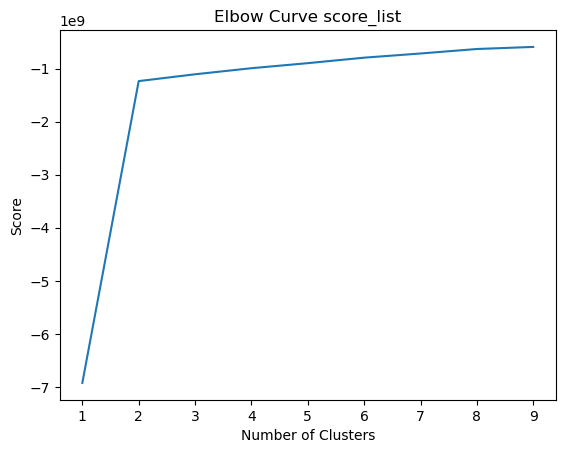

In [43]:
# Plot the list elbow curve using PyLab.

pl.plot(num_cl,score_list)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve score_list')


### Here there is a large jump from 1 to 2, thereafter the curve straightens out. This means that the optimal number of clusters for df_list will be 2

Text(0.5, 1.0, 'Elbow Curve score_rate')

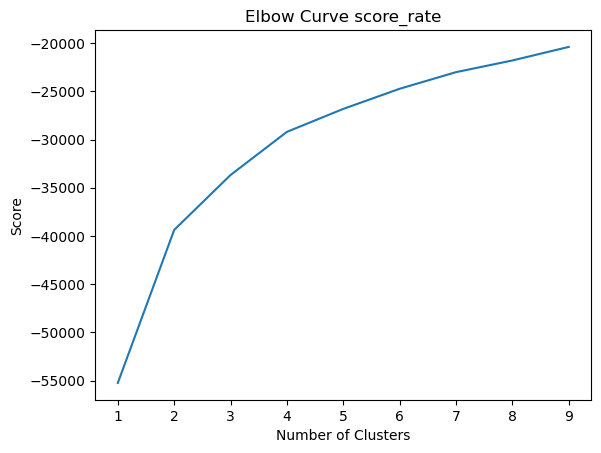

In [45]:
# Plot the rate  elbow curve using PyLab.

pl.plot(num_cl,score_rate)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve score_rate')


### Here the Curve straightens out after 4. This means that 4 will be the optimal number of clusters for df_rate. 

## 4. k-means clustering

### df_list

In [47]:
# Create the k-means object.

kmeans_list = KMeans(n_clusters = 2) 


In [48]:
#fit to df_list
kmeans_list.fit(df_list)

C:\Users\Asus 17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [49]:
#create a collumn to hold the resulting clusters
df_list['clusters'] = kmeans_list.fit_predict(df_list)

C:\Users\Asus 17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [51]:
#take a look
df_list.head()

,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,clusters
0,484.0,59.0,570.0,1.0,100.0,50.0,1,20.0,3,15,248,97.0,1,1
1,484.0,160.0,543.0,2.0,300.0,40.0,2,15.0,4,20,42,96.0,1,1
2,484.0,80.0,570.0,2.0,150.0,35.0,2,0.0,1,1000,233,87.0,2,0
3,484.0,125.0,650.0,2.0,300.0,40.0,2,10.0,14,60,1,100.0,2,1
4,484.0,150.0,810.0,2.0,0.0,0.0,1,0.0,2,730,171,99.0,1,0


In [52]:
df_list['clusters'].value_counts(dropna = False)

clusters
0    10778
1     9252
Name: count, dtype: int64

### df_rate

In [53]:
# Create the k-means object.

kmeans_rate = KMeans(n_clusters = 4) 

In [54]:
# Fit the k-means object to the data.

kmeans_rate.fit(df_rate)

C:\Users\Asus 17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [55]:
#create a new column to hold the cluster 
df_rate['clusters'] = kmeans_rate.fit_predict(df_rate)

C:\Users\Asus 17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [56]:
#take a look
df_rate.head()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,clusters
0,10.0,10.0,10.0,10.0,9.0,10.0,1
1,10.0,9.0,10.0,10.0,9.0,9.0,3
2,9.0,10.0,9.0,9.0,10.0,9.0,3
3,10.0,10.0,10.0,10.0,10.0,10.0,1
4,10.0,10.0,10.0,10.0,10.0,10.0,1


In [57]:
df_rate['clusters'].value_counts(dropna = False)

clusters
3    9504
1    7680
0    2597
2     249
Name: count, dtype: int64

## 5. Visualizations

### df_list

Text(0, 0.5, 'price')

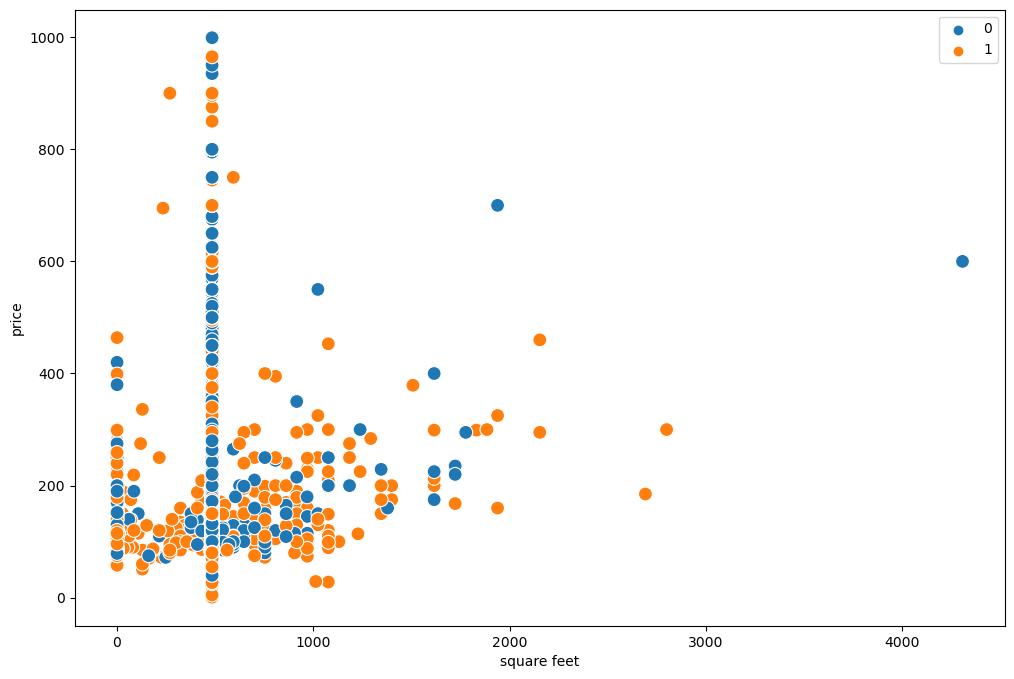

In [59]:
# plot the clusters for square_feet and price
plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = df_list['square_feet'], y = df_list['price'], hue = kmeans_list.labels_, s = 100)
#remove the grid
ax.grid(False)
#labels
plt.xlabel('square feet')
plt.ylabel('price')

Text(0, 0.5, 'extra people')

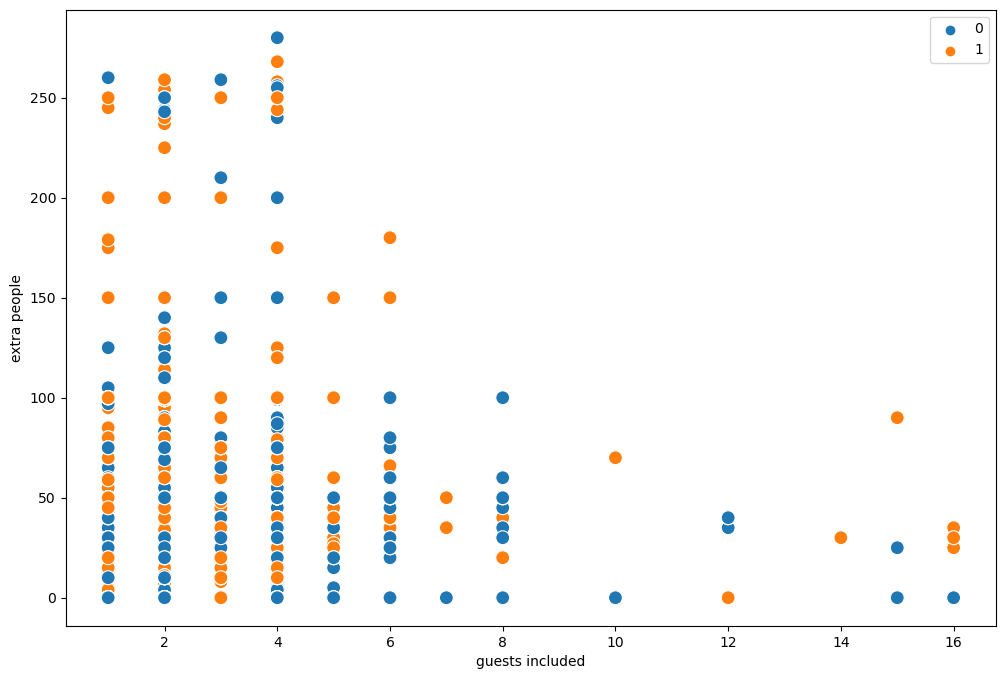

In [60]:
# plot the clusters for guests_included and extra_people
plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = df_list['guests_included'], y = df_list['extra_people'], hue = kmeans_list.labels_, s = 100)
#remove the grid
ax.grid(False)
#labels
plt.xlabel('guests included')
plt.ylabel('extra people')

Text(0, 0.5, 'price')

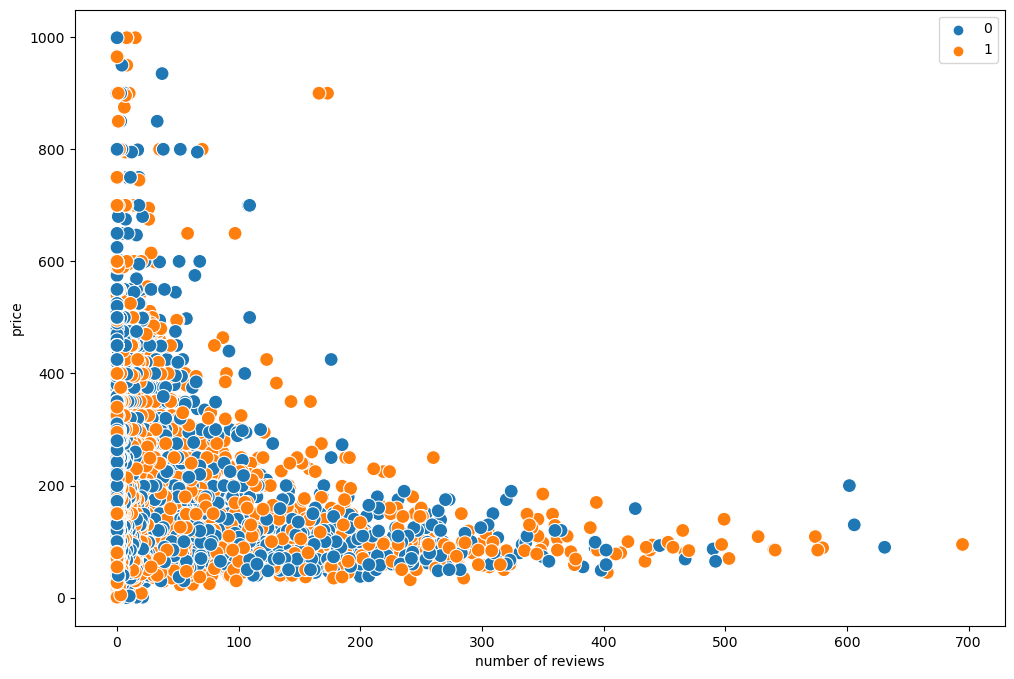

In [61]:
# plot the clusters for number_of_reviews and price
plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = df_list['number_of_reviews'], y = df_list['price'], hue = kmeans_list.labels_, s = 100)
#remove the grid
ax.grid(False)
#labels
plt.xlabel('number of reviews')
plt.ylabel('price')

Text(0, 0.5, 'price')

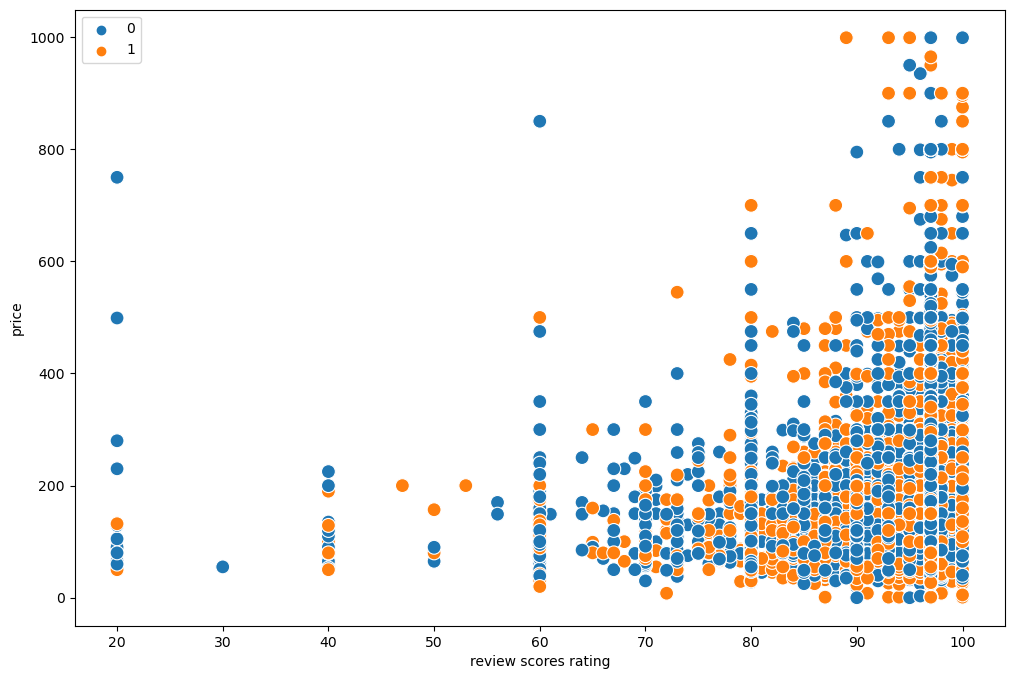

In [63]:
# plot the clusters for review_scores_rating and price
plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = df_list['review_scores_rating'], y = df_list['price'], hue = kmeans_list.labels_, s = 100)
#remove the grid
ax.grid(False)
#labels
plt.xlabel('review scores rating')
plt.ylabel('price')

#### Reflections
None of these variable pairs show a clear separation of the clusters. The interrelation of the variables may be too complex to see clearly in 2D. 

### df_rate

Text(0, 0.5, 'communication score')

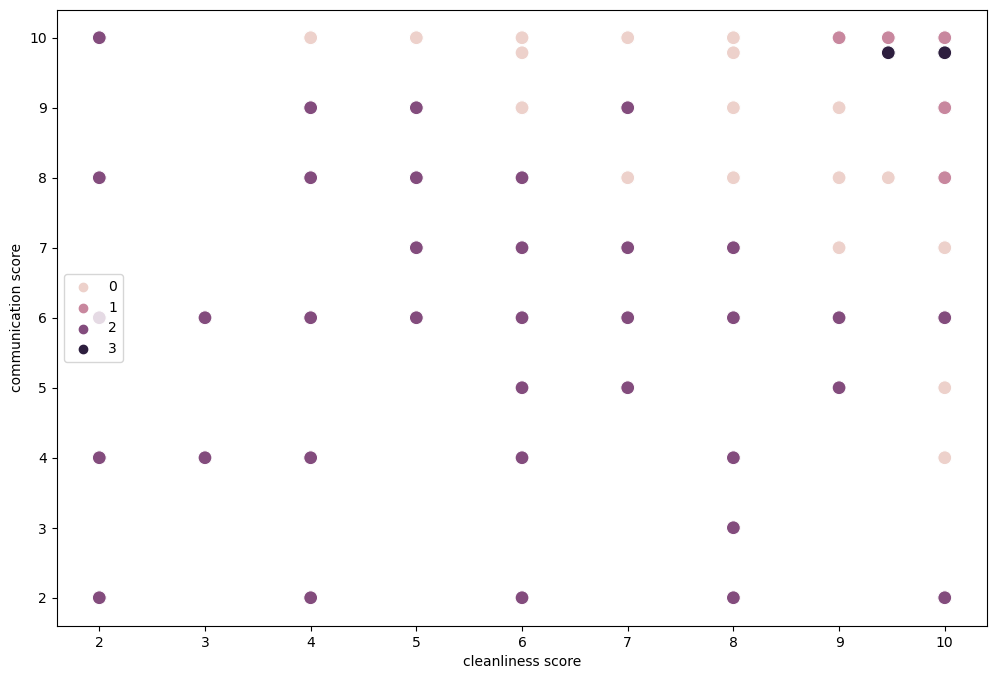

In [64]:
# plot the clusters for review_scores_cleanliness and review_scores_communication
plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = df_rate['review_scores_cleanliness'], y = df_rate['review_scores_communication'], hue = kmeans_rate.labels_, s = 100)
#remove the grid
ax.grid(False)
#labels
plt.xlabel('cleanliness score')
plt.ylabel('communication score')

Text(0, 0.5, 'location score')

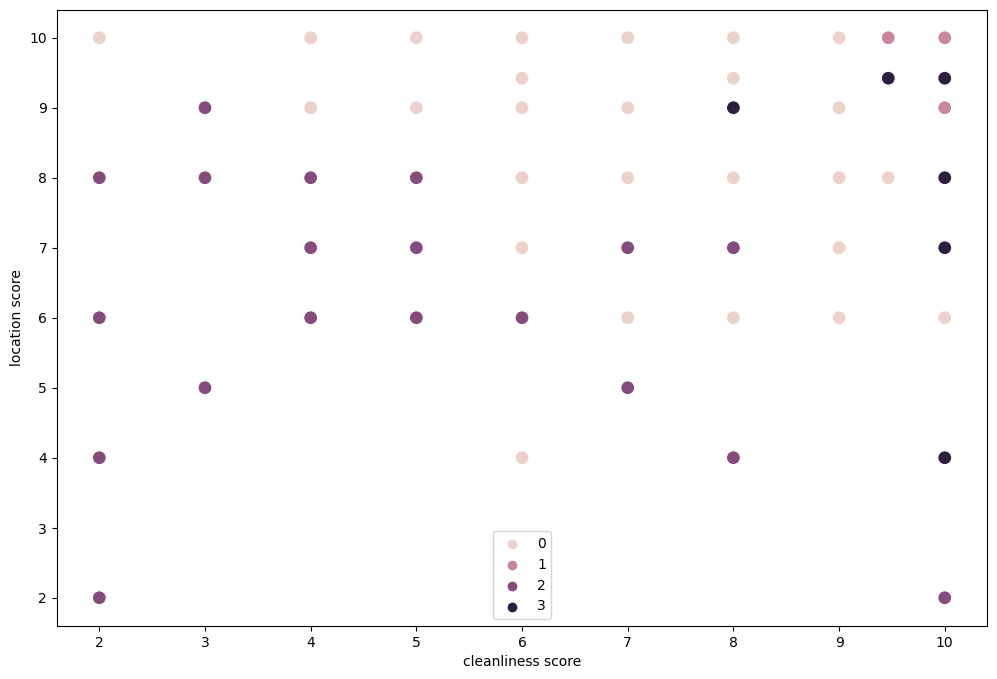

In [65]:
# plot the clusters for review_scores_cleanliness and review_scores_location
plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = df_rate['review_scores_cleanliness'], y = df_rate['review_scores_location'], hue = kmeans_rate.labels_, s = 100)
#remove the grid
ax.grid(False)
#labels
plt.xlabel('cleanliness score')
plt.ylabel('location score')

Text(0, 0.5, 'accuracy score')

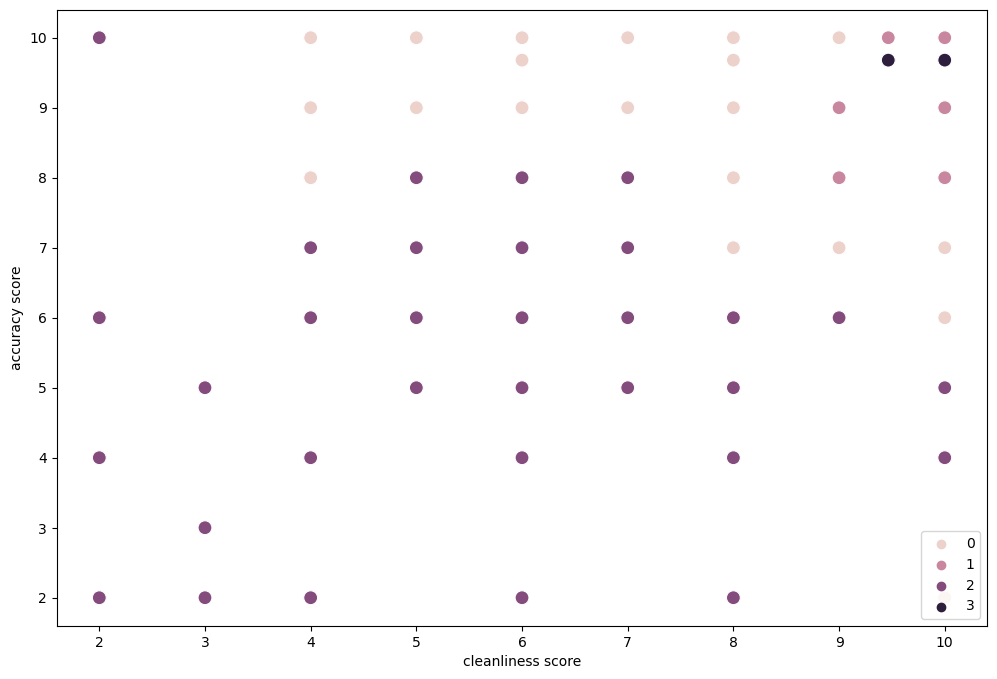

In [66]:
# plot the clusters for review_scores_cleanliness and review_scores_accuracy
plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = df_rate['review_scores_cleanliness'], y = df_rate['review_scores_accuracy'], hue = kmeans_rate.labels_, s = 100)
#remove the grid
ax.grid(False)
#labels
plt.xlabel('cleanliness score')
plt.ylabel('accuracy score')

### Reflections
Here there is a clear divid between clusters 0-2. Cluster 3 is difficult for me to explain at this point. I'll need to look a little deeper. 

## 6. Summary Stats

In [69]:
#df_list
df_list.groupby('clusters'). agg({'price' : ['mean', 'median'], 'square_feet' : ['mean', 'median'], 'number_of_reviews' : ['mean', 'median'], 'review_scores_rating' : ['mean', 'median']})

price        square_feet        number_of_reviews         \
                mean median        mean median              mean median   
clusters                                                                  
0         150.384394  125.0  484.801262  484.0         19.129523    7.0   
1         146.834630  125.0  484.667639  484.0         24.392348   10.0   

         review_scores_rating         
                         mean median  
clusters                              
0                   94.866209   97.0  
1                   95.443472   97.0

The biggest difference here is in the number of reviews. Perhaps I'll need to look deeper into how that variable relates to the others. 

In [71]:
#df_rate
df_rate.groupby('clusters'). agg({'review_scores_cleanliness' : ['mean', 'median'], 'review_scores_communication' : ['mean', 'median'], 'review_scores_location' : ['mean', 'median'], 'review_scores_accuracy' : ['mean', 'median']})

review_scores_cleanliness            review_scores_communication  \
                              mean     median                        mean   
clusters                                                                    
0                         8.427390   9.000000                    9.219319   
1                         9.936319  10.000000                    9.955803   
2                         6.309237   7.000000                    7.144578   
3                         9.451668   9.465627                    9.871489   

                review_scores_location        review_scores_accuracy         
         median                   mean median                   mean median  
clusters                                                                     
0           9.0               9.008026    9.0               8.969857    9.0  
1          10.0               9.842633   10.0               9.941234   10.0  
2           8.0               7.923695    8.0               6.646586    7.0  
3          10.0               9.233482    9.0               9.741930   10.0

Group 2 is clearly distincty from the other variables, particularly on cleanliness and accuracy. interestingly groups 0, 3, 1 seem to increase in that order. 

### Further down the pipeline:

This clustering of the rating results could help in identifying patterns across the rest of the data. Especially clustering the lower scores together. It will be interesting to find out if those lower reviews are all say, in a certain area or for a certain property type, or even if there is a pattern across the year of when lower reviews are more likely to come in. 

NameError: name 'df_rate' is not defined